In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
def predprocessing(text):
    text = text.replace('<sup>H</sup>', 'ᴴ')
    text = text.replace('<sup>н</sup>', 'ᴴ')
    text = text.replace('<sup>Н</sup>', 'ᴴ')
    text = text.replace('<sup>н</sup>', 'ᴴ')
    text = text.replace('<sup>К</sup>', 'ᴴ')
    text = text.replace('<sup>к</sup>', 'ᴴ')
    text = text.replace('!', '|')
    text = text.replace('<sup>1</sup>', '¹')
    text = text.replace('<sup>2</sup>', '²')
    text = text.replace('<sup>3</sup>', '³')
    text = re.sub(r'(\w)(\d)(\w)', r'\1|\3', text)
    text = re.sub(r'(\w)1', r'\1|', text)
    text = re.sub(r'¯1', r'¯|', text)
    return text

In [3]:
def lemma_change(lemm):
    lemm = lemm.replace('Ы', 'Ь|')
    lemm = lemm.replace('Ю', '|О')
    lemm = lemm.replace('0', 'О')
    return lemm

In [4]:
with open('kara_work.html', 'r', encoding='utf-8') as f:
    html = f.read()
    
    
WL = {}
lemmas = []
w_classes = []
transs = []
morphons = []
sources = []
dialects = []
borrow = []


html = predprocessing(html)

soup = BeautifulSoup(html, 'html.parser')
wordlines = soup.find_all('p')

for wordline in wordlines:
    trans = ''
    morphon = re.search(r'\(.*?\)', wordline.get_text())
    w_class = re.search(r'I{1,3}', wordline.get_text())
    if w_class:
        w_classes.append(w_class.group())
    else:
        w_classes.append('no info')
    spans = wordline.find_all('span')
    lemma = spans[0].get_text()
    lemma = re.sub(r'\(.*?\)', '', lemma)
    lemma = re.sub(r'I{1,3}', '', lemma)
    if morphon is None:
        morphons.append('no info')
        dialects.append('норма')
    if morphon: 
        if morphon.group() == '(тук )' or morphon.group() == '(тук.)':
            dialects.append('тукитинский')
            morphons.append('no info')
        else:
            if '-' not in morphon.group():
                dialects.append('норма')
                morphons.append('no info')
            else:
                dialects.append('норма')
                morphons.append(morphon.group())
            
    for span in spans[1:]:
        trans += span.get_text()
    trans = trans.replace('(тук )', '')
    trans = trans.replace('(тук.)', '')
    lemmas.append(lemma_change(lemma))
    transs.append(trans.lower())
    sources.append(wordline)
    if 'рел.' in trans:
        borrow.append('1')
    elif 'ДЖ' in lemma_change(lemma):
        borrow.append('1')
    elif 'рус.' in trans:
        borrow.append('1')
    elif 'нац.' in trans:
        borrow.append('1')
    else:
        borrow.append('0')



WL['dialect'] = dialects
WL['borrow'] = borrow
WL['lemma'] = lemmas
WL['class'] = w_classes
WL['morphonology'] = morphons
WL['translation'] = transs
WL['source'] = sources

df = pd.DataFrame(WL)
df.to_csv('karata.csv')

In [5]:
work = list(df['lemma'])

In [6]:
def lemma_clear(line):
    new = ''
    symbols = "'¯/|: ᴴ"
    for i in line:
        if i.isupper() or i in symbols:
            new += i
    return new

In [7]:
def ipalize2(lemma):
    lemma = lemma.replace('Г|', '-ʕ-')
    lemma = lemma.replace('ГЪ', '-ʁ-')
    lemma = lemma.replace('ГЬ', '-h-')
    lemma = lemma.replace('Г', '-ɡ-')
    
    lemma = lemma.replace('П|', '-pʼ-')
    lemma = lemma.replace('П', '-p-')

    lemma = lemma.replace('ХЬ', '-x-')
    lemma = lemma.replace('ХЪ', '-qχ-')
    lemma = lemma.replace('Х¯', '-χː-')
    lemma = lemma.replace('Х|', '-χʼ-')
    lemma = lemma.replace('Х', '-χ-')
    lemma = lemma.replace('Ц¯|', '-tsʼː-')
    lemma = lemma.replace('Ц|', '-tsʼ-')
    lemma = lemma.replace('Ц¯', '-tsː-')
    lemma = lemma.replace('Ц', '-ts-')   
    lemma = lemma.replace('ДЖ', '-dʒ-')
    lemma = lemma.replace('Ч¯|', '-tɕʼː-')
    lemma = lemma.replace('Ч|', '-tɕʼ-')
    lemma = lemma.replace('Ч¯', '-tɕː-')
    lemma = lemma.replace('Ч', '-tɕ-')
    
    lemma = lemma.replace('Б', '-b-')
    lemma = lemma.replace('В', '-w-')
    lemma = lemma.replace('Р', '-r-')
    lemma = lemma.replace('Т|', '-tʼ-')
    
    lemma = lemma.replace('КЬ|', '-tɬː-')
    lemma = lemma.replace('К¯|', '-kʼː-')
    lemma = lemma.replace('К¯', '-kː-')
    lemma = lemma.replace('К|', '-kʼ-')
    lemma = lemma.replace('КЬ', '-tɬ-')
    lemma = lemma.replace('КЪ', '-qʼ-')
    lemma = lemma.replace('К', '-k-')
    
    
    lemma = lemma.replace('Л¯Ъ¯', '-ɬː-')
    lemma = lemma.replace('Л¯', '-l-')
    lemma = lemma.replace('ЛЪ', '-ɬ-')
    lemma = lemma.replace('Л|', '-lʼ-')
    lemma = lemma.replace('Л', '-l-')
    
    lemma = lemma.replace('М', '-m-')
    lemma = lemma.replace('Н', '-n-')
    
    lemma = lemma.replace('Т¯', '-tː-')
    lemma = lemma.replace('Т', '-t-')
    lemma = lemma.replace('Д', '-d-')
    
    lemma = lemma.replace('С¯', '-sː-')
    lemma = lemma.replace('С', '-s-')
    lemma = lemma.replace('З', '-z-')
    lemma = lemma.replace('Й', '-j-')
    lemma = lemma.replace('Ж', '-ʒ-')   
    lemma = lemma.replace('Ш', '-ʃ-')
    lemma = lemma.replace('Щ', '-ʃː-')
    
    
    lemma = lemma.replace("А¯'ᴴ", "-'ãː-")
    lemma = lemma.replace("А¯'", "-'aː-")
    lemma = lemma.replace("А¯ᴴ", "-ãː-")
    lemma = lemma.replace("А'ᴴ", "-'ã-")
    lemma = lemma.replace("А'", "-'a-")
    lemma = lemma.replace("Аᴴ", "-ã-")
    lemma = lemma.replace("А¯", "-aː-")
    lemma = lemma.replace("А", "-a-")
    
    lemma = lemma.replace("О¯'ᴴ", "-'õː-")
    lemma = lemma.replace("О¯'", "-'oː-")
    lemma = lemma.replace("О¯ᴴ", "-õː-")
    lemma = lemma.replace("О'ᴴ", "-'õ-")
    lemma = lemma.replace("О'", "-'o-")
    lemma = lemma.replace("Оᴴ", "-õ-")
    lemma = lemma.replace("О¯", "-oː-")
    lemma = lemma.replace("О", "-o-")
    
    lemma = lemma.replace("У¯'ᴴ", "-'ũː-")
    lemma = lemma.replace("У¯'", "-'uː-")
    lemma = lemma.replace("У¯ᴴ'", "-'ũː-")
    lemma = lemma.replace("У¯ᴴ", "-ũː-")
    lemma = lemma.replace("У'ᴴ", "-'ũ-")
    lemma = lemma.replace("У'", "-'u-")
    lemma = lemma.replace("Уᴴ", "-ũ-")
    lemma = lemma.replace("У¯", "-uː-")
    lemma = lemma.replace("У", "-u-")
    
    lemma = lemma.replace("И¯'ᴴ", "-'ĩː-")
    lemma = lemma.replace("И¯'", "-'iː-")
    lemma = lemma.replace("И¯ᴴ'", "-'ĩː-")
    lemma = lemma.replace("И¯ᴴ", "-ĩː-")
    lemma = lemma.replace("И'ᴴ", "-'ĩ-")
    lemma = lemma.replace("И'", "-'i-")
    lemma = lemma.replace("Иᴴ", "-ĩ-")
    lemma = lemma.replace("И¯", "-iː-")
    lemma = lemma.replace("И", "-i-")
    
    lemma = lemma.replace("Е¯'ᴴ", "-'ẽː-")
    lemma = lemma.replace("Е¯'", "-'eː-")
    lemma = lemma.replace("Е¯ᴴ'", "-'ẽː-")
    lemma = lemma.replace("Е¯ᴴ", "-ẽː-")
    lemma = lemma.replace("Е'ᴴ", "-'ẽ-")
    lemma = lemma.replace("Е'", "-'e-")
    lemma = lemma.replace("Еᴴ", "-ẽ-")
    lemma = lemma.replace("Е¯", "-eː-")
    lemma = lemma.replace("Е", "-e-")
    
    lemma = lemma.replace("Э¯'ᴴ", "-'ẽː-")
    lemma = lemma.replace("Э¯'", "-'eː-")
    lemma = lemma.replace("Э¯ᴴ'", "-'ẽː-")
    lemma = lemma.replace("Э¯ᴴ", "-ẽː-")
    lemma = lemma.replace("Э'ᴴ", "-'ẽ-")
    lemma = lemma.replace("Э'", "-'e-")
    lemma = lemma.replace("Эᴴ", "-ẽ-")
    lemma = lemma.replace("Э¯", "-eː-")
    lemma = lemma.replace("Э", "-e-")
    
    lemma = lemma.replace("Я", "-j-a-")
    lemma = lemma.replace("Ъ", '-ʔ-')

    lemma = lemma.replace('--','-')
    lemma = lemma.replace('--','-')
    lemma = lemma.replace('/', '')
    lemma = lemma.replace('--','-')
    lemma = lemma.replace("-l-l-", "-ll-")
    lemma = lemma.replace("-n-n-", "-nn-")
    lemma = lemma.replace("-k-k-", "-kk-")
    lemma = lemma.replace("-r-r-", "-rr-")
    lemma = lemma.replace("-m-m-", "-mm-")

    
    lab_from = []
    lab_to = []

    f = ['b', 'ɬ', 'd', 'w', 'h', 'qʼ', 'k', 't', 'kʼ', 'j', 'ɡ', 'qχ', 'ʕ', 'tʼ', 's', 'χʼ', 'tɕ', 'tɕʼ', 'sː', 'χ', 'tɬ', 'z', 'χː', 'ʃ', 'p', 'ʁ', 'ʃː', 'tsʼ', 'lʼ', 'tsʼː', 'ʒ', 'ʔ', 'x', 'tɬː', 'tɕʼː', 'ts', 'tsː', 'kʼː', 'tɕː', 'ɬː', 'pʼ', 'kː']
    for i in f:
        lab_from.append(i+'-w')
    for i in f:
        lab_to.append(i+'ʷ')
    cons_from = ['ʁ-w', 'χː-w', 'tsʼː-w', 'tɕʼ-w', 'ʃː-w','ɡ-w','h-w','ʕ-w', 'k-w', 'qʼ-w', 'χ-w', 'kʼ-w', 'qχ-w', 'ts-w', 'ts'] 
    cons_to = ['ʁʷ', 'χːʷ', 'tsʼːʷ', 'tɕʼʷ', 'ʃːʷ','ɡʷ','hʷ','ʕʷ', 'kʷ', 'qʼʷ', 'χʷ', 'kʼʷ', 'qχʷ', 'tsʷ']
    cons_from1 = ['χ-w','tɕʼ-w','ɡ-w', 'ʁ-w', 'k-w', 'bʼ-w', 'tsʼ-w', 'zː-w', 'qʼ-w', 'tɬː-w', 'p-w', 'tʼ-w', 'ʃ-w', 'sː-w', 'ts-w', 'mː-w', 'kʼ-w', 'ʃː-w', 'tɕ-w', 'ʔ-w', 's-w', 'ʕ-w', 'χː-w', 'tɬ-w', 'χʼ-w', 'tsː-w', 'tɕː-w', 'ʒ-w', 'ʒː-w', 'x-w', 'tsʼː-w', 'kː-w', 'kʼː-w', 'tɕʼː-w']
    cons_to1 = ['bʷ', 'hʷ', 'tʷ', 'lʷ', 'dʷ', 'ɬːʷ', 'jʷ', 'ɬʷ', 'rʷ', 'qχʷ', 'χʷ', 'nʷ', 'tɕʼʷ', 'wʷ', 'ɡʷ', 'ʁʷ', 'zʷ', 'mʷ', 'kʷ', 'lʼʷ', 'dʒʷ', 'bʼʷ', 'tsʼʷ', 'zːʷ', 'qʼʷ', 'tɬːʷ', 'pʷ', 'tʼʷ', 'ʃʷ', 'sːʷ', 'tsʷ', 'mːʷ', 'kʼʷ', 'ʃːʷ', 'tɕʷ', 'ʔʷ', 'sʷ', 'ʕʷ', 'χːʷ', 'tɬʷ', 'χʼʷ', 'tsːʷ', 't͡ɕːʷ', 'ʒʷ', 'ʒːʷ', 'xʷ', 'tsʼːʷ', 'kːʷ', 'kʼːʷ', 'tɕʼːʷ', 'nːʷ', 'dʼʷ', '¯Ьʷ', 'pʼʷ', 'ĩːʷ', 'qχʼːʷ', 'Ь|ʷ', 'tːʷ', 'Ьʷ']
    for i in range(len(lab_from)):
        lemma = lemma.replace(lab_from[i], lab_to[i])
        
    return lemma

In [8]:
ipas = []
for i in range(len(work)):
    ipas.append(ipalize2(lemma_clear(work[i])))

In [9]:
WL2 = {}
WL2['dialect'] = dialects
WL2['borrowing'] = borrow
WL2['lemma'] = lemmas
WL2['ipa'] = ipas
WL2['class'] = w_classes
WL2['morphonology'] = morphons
WL2['translation'] = transs
WL2['source'] = sources

df2 = pd.DataFrame(WL2)
df2.to_csv('karataipa.csv')

In [10]:
df3 = df2[df2['borrowing'] == '0']

In [11]:
df3 = df3.reset_index(drop=True)

In [12]:
from collections import Counter
for_set = []
add = []
fl = list(df3['ipa'])
for i in fl:      
    for_set.append(i.split('-'))

In [13]:
phonem_set = []
for i in range(len(for_set)):
    for j in for_set[i]:
        phonem_set.append(j)

In [14]:
norm_sounds = []
for i in phonem_set:
    if i:
        i = re.sub(r'\s*', '', i)
        if i == '':
            continue
        norm_sounds.append(i)

In [15]:
phonemes = []
for i in norm_sounds:
    phonemes.append(i.replace("'", ''))

# Слоги

In [16]:
syldf = pd.DataFrame(phonemes)

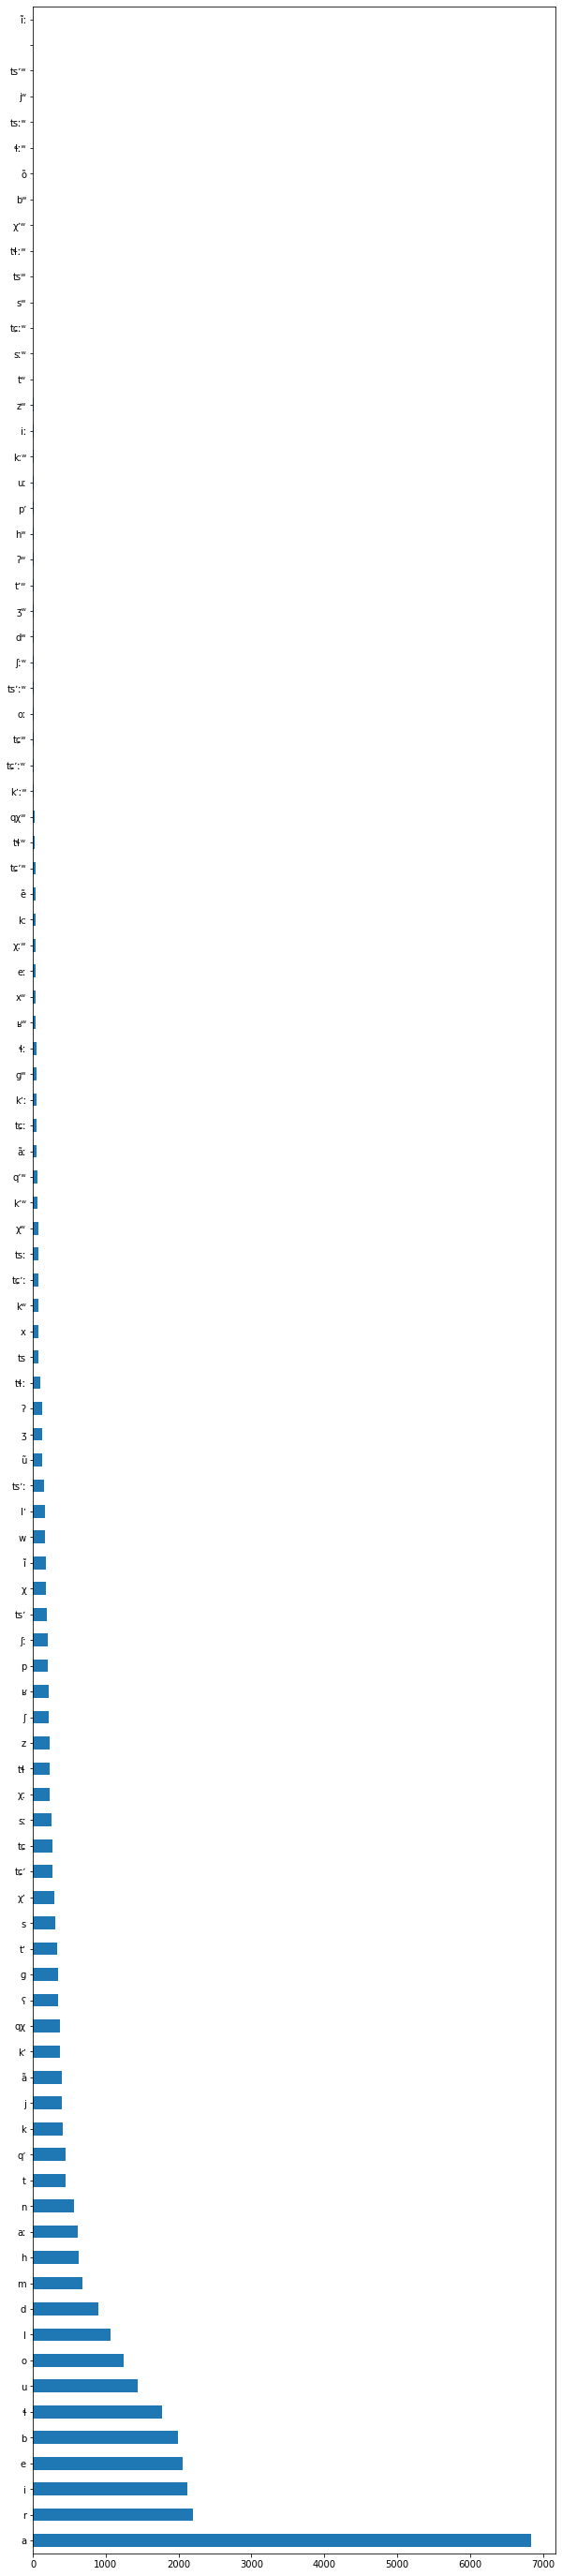

In [17]:
plt.figure(figsize=(10, 50))
phon_count = syldf[0].value_counts()
phon_count.plot.barh()

In [18]:
ipa_lemms_raw = []   
for i in range(len(for_set)):
    ipa_lem_work = ''
    for j in for_set[i]:
        if j != '':
            j = re.sub(r'\s*', '', j)
            ipa_lem_work += j + '-'
    ipa_lemms_raw.append(ipa_lem_work) 

In [19]:
ipa_lemms = []
ipa_lemms_clean = []
for i in ipa_lemms_raw:
    i = i.replace(':', '')
    ipa_lemms_clean.append(i.replace('--', '-'))
for i in ipa_lemms_clean:
    if i[0] == '-' and i[-1] == '-':
        ipa_lemms.append(i[1:-1])
    elif i[0] == '-':
        ipa_lemms.append(i[1:])
    elif i[-1] == '-':
        ipa_lemms.append(i[:-1])
        

In [20]:
df3['ipa'] = ipa_lemms

In [21]:
vowels = ['ãː','ã','aː','a','ĩ','ĩː','iː','i','ẽː','ẽ','eː','e','ũ','uː','u','õ','oː','o']
vowels_stressed = ["'ãː","'aː","'ã","'a","'ĩː","'ĩ","'iː","'i","'ẽː","'ẽ","'eː","'e","'ũ","'uː","'u","'õ","'oː","'o"]
consonants = []
for i in set(phonemes):
    if i not in vowels:
        consonants.append(i)

In [22]:
vowels_array = []
consonants_array = []
for i in phonemes:
    if i != '':
        if i in vowels or i in vowels_stressed:
            vowels_array.append(i)
        else:
            consonants_array.append(i)

# Статистика фонем

In [23]:
vowels_stats = Counter(vowels_array).most_common()
for i in vowels_stats:
    print(i[0],':',i[1],':',round((i[1]/len(vowels_array))*100, 2),'%')
    
print()
consonants_stats = Counter(consonants_array).most_common()
for i in consonants_stats:
    print(i[0],':',i[1], ':','(',round((i[1]/len(consonants_array))*100, 2),'%',')')

a : 6831 : 45.01 %
i : 2123 : 13.99 %
e : 2056 : 13.55 %
u : 1441 : 9.49 %
o : 1249 : 8.23 %
aː : 615 : 4.05 %
ã : 393 : 2.59 %
ĩ : 175 : 1.15 %
ũ : 133 : 0.88 %
ãː : 55 : 0.36 %
eː : 39 : 0.26 %
ẽ : 35 : 0.23 %
oː : 14 : 0.09 %
uː : 8 : 0.05 %
iː : 6 : 0.04 %
õ : 3 : 0.02 %
ĩː : 1 : 0.01 %

r : 2192 : ( 11.75 % )
b : 1989 : ( 10.67 % )
ɬ : 1768 : ( 9.48 % )
l : 1065 : ( 5.71 % )
d : 903 : ( 4.84 % )
m : 684 : ( 3.67 % )
h : 629 : ( 3.37 % )
n : 571 : ( 3.06 % )
t : 448 : ( 2.4 % )
qʼ : 446 : ( 2.39 % )
k : 405 : ( 2.17 % )
j : 402 : ( 2.16 % )
kʼ : 375 : ( 2.01 % )
qχ : 374 : ( 2.01 % )
ʕ : 350 : ( 1.88 % )
ɡ : 342 : ( 1.83 % )
tʼ : 329 : ( 1.76 % )
s : 305 : ( 1.64 % )
χʼ : 289 : ( 1.55 % )
tɕʼ : 273 : ( 1.46 % )
tɕ : 271 : ( 1.45 % )
sː : 262 : ( 1.4 % )
χː : 232 : ( 1.24 % )
z : 229 : ( 1.23 % )
tɬ : 229 : ( 1.23 % )
ʃ : 222 : ( 1.19 % )
ʁ : 217 : ( 1.16 % )
p : 211 : ( 1.13 % )
ʃː : 199 : ( 1.07 % )
tsʼ : 194 : ( 1.04 % )
χ : 181 : ( 0.97 % )
w : 169 : ( 0.91 % )
lʼ : 163 :

In [24]:
c = {}
c1 = []
c2 = []
c3 = []
for i in vowels_stats:
    c1.append(i[0])
    c2.append(i[1])
    c3.append(str(round((i[1]/len(vowels_array))*100, 2))+'%')
c['Фонема'] = c1
c['Количество вхождений'] = c2
c['Процентное соотношение'] = c3
outstatscons = pd.DataFrame(c)
outstatscons.to_csv('vows_stats.csv')

In [25]:
initials = []
initials_len = []
for lemm in ipa_lemms:
    init_a = []
    for s in lemm.split('-'):
        if s in vowels or s in vowels_stressed:
            if len(init_a) == 0:
                init_a.append('#')
                break
            else:
                break
        else:
            init_a.append(s)
    initials.append(init_a)
for i in initials:
    if i[0] == '#':
        initials_len.append(0)
    else:
        initials_len.append(len(i))

In [26]:
finals = []
finals_len = []
for lemm in ipa_lemms:
    fin_a = []
    lemm = lemm.split('-')
    lemm.reverse()
    for s in lemm:
        if s in vowels or s in vowels_stressed:
            if len(fin_a) == 0:
                fin_a.append('#')
                break
            else:
                break
        else:
            fin_a.append(s) 
    fin_a.reverse()
    finals.append(fin_a)
for i in finals:
    if i[0] == '#':
        finals_len.append(0)
    else:
        finals_len.append(len(i))

In [27]:
df3['initial'] = initials
df3['initial len'] = initials_len
df3['final'] = finals
df3['final len'] = finals_len
df3

,dialect,borrowing,lemma,ipa,class,morphonology,translation,source,initial,initial len,final,final len
0,тукитинский,0,АБА-ГЬАБАТАЛИ,a-b-a-h-a-b-a-t-a-l-i,no info,no info,см. гьаба-гъвабажва‾бхва,"[[АБА-ГЬАБАТАЛИ ], [(тук ) см.], [ гьаба-гъваб...",[#],0,[#],0
1,норма,0,АБАДАЛ¯Ъ¯И'Л,a-b-a-d-a-ɬː-'i-l,no info,no info,нареч 1) ни за что; абадалъил гегьибич|е гьощу...,"[[АБАДАЛ¯Ъ¯И'Л], [нареч], [ 1) ни за что; ], [...",[#],0,[l],1
2,норма,0,АБАДАЛ-ИЛА'ЙЛ¯Ъ¯-ИЛ,a-b-a-d-a-l-i-l-'a-j-ɬː-i-l,no info,no info,нареч 1) ни за что; абадалъил гегьибич|е гьощу...,"[[АБАДАЛ-ИЛА'ЙЛ¯Ъ¯-ИЛ ], [нареч], [ 1) ни за ч...",[#],0,[l],1
3,тукитинский,0,АБАТАЛЕ,a-b-a-t-a-l-e,no info,no info,см. гьабажвалъа,"[[АБАТАЛЕ ], [(тук ) см.], [ гьабажвалъа]]",[#],0,[#],0
4,тукитинский,0,АБАТАЛЕДУ,a-b-a-t-a-l-e-d-u,no info,no info,см гералъа,"[[АБАТАЛЕДУ ], [(тук.) см], [ гералъа]]",[#],0,[#],0
...,...,...,...,...,...,...,...,...,...,...,...,...
5378,норма,0,ЪВА'РЪА,ʔʷ-'a-r-ʔ-a,III,"(илол|,-ди)","iii (илол|,-ди) кал, экскременты; помёт {птичи...","[[ЪВА'РЪА ], [III ], [(илол|,-ди) ], [кал, экс...",[ʔʷ],1,[#],0
5379,норма,0,ЪОХ|/А¯'ЛЪА,ʔ-o-χʼ-'aː-ɬ-a,no info,"(-ё, -ас, -ёй, -ебхва, -еда)",кашлять; дийа ъох|алъа кьваᴴи бе-хьуда я много...,"[[ЪОХ|/А¯'ЛЪА (-ё, -ас, -ёй, -ебхва, -еда) ], ...",[ʔ],1,[#],0
5380,норма,0,ЪО'Х|О,ʔ-'o-χʼ-o,III,(-л|),iii (-л|) кашель; каъа-маъас ъохю легкий кашел...,"[[ЪО'Х|О ], [III ], [(-л|) ], [кашель; ], [каъ...",[ʔ],1,[#],0
5381,норма,0,ЪОЪО'Б/АЛЪА,ʔ-o-ʔ-'o-b-a-ɬ-a,no info,"(-е, -ас, -а, -ебхва, -да)",качать {колыбель); кене ъоъобалъа качать люльку,"[[ЪОЪО'Б/АЛЪА (-е, -ас, -а, -ебхва, -да) ], [к...",[ʔ],1,[#],0


In [28]:
init_fin_a = []
for i in range(len(df3)):
    init_fin_a.append(df3.loc[i]['initial'] + df3.loc[i]['final'])

In [29]:
intervoc_a = []
intervoc_cluster_len = []
intervoc_to_df = []
for i in df3['ipa']:
    
    for vs in vowels_stressed:
        i = i.replace(vs, 'VV')
    for v in vowels:
        i = i.replace(v, 'VV')
    i = i.replace('Vː', 'V')
    if re.findall('V(.+?)V', i):
        int_voc = []
        intervoc =  re.findall('V(.+?)V', i)
        for i in intervoc:
            int_voc.append(i.replace('V', '').replace('-',''))
            intervoc_a.append(i.replace('V', ''))
        intervoc_to_df.append(int_voc)
    else:
        intervoc_to_df.append('')
for i in intervoc_to_df:
    intervoc_cluster_len.append(len(i))

In [30]:
intervoc_a_norm = []
intervoc_len = []
for i in intervoc_a: 
    ql_norm = []
    ql = i.split('-')
    for j in ql:
        if j != '':
            ql_norm.append(j)
    intervoc_a_norm.append(ql_norm)
    intervoc_len.append(len(ql_norm))   

In [31]:
df3['combination'] = init_fin_a
df3['intervocal clusters'] = intervoc_to_df
df3

,dialect,borrowing,lemma,ipa,class,morphonology,translation,source,initial,initial len,final,final len,combination,intervocal clusters
0,тукитинский,0,АБА-ГЬАБАТАЛИ,a-b-a-h-a-b-a-t-a-l-i,no info,no info,см. гьаба-гъвабажва‾бхва,"[[АБА-ГЬАБАТАЛИ ], [(тук ) см.], [ гьаба-гъваб...",[#],0,[#],0,"[#, #]","[b, h, b, t, l]"
1,норма,0,АБАДАЛ¯Ъ¯И'Л,a-b-a-d-a-ɬː-'i-l,no info,no info,нареч 1) ни за что; абадалъил гегьибич|е гьощу...,"[[АБАДАЛ¯Ъ¯И'Л], [нареч], [ 1) ни за что; ], [...",[#],0,[l],1,"[#, l]","[b, d, ɬː]"
2,норма,0,АБАДАЛ-ИЛА'ЙЛ¯Ъ¯-ИЛ,a-b-a-d-a-l-i-l-'a-j-ɬː-i-l,no info,no info,нареч 1) ни за что; абадалъил гегьибич|е гьощу...,"[[АБАДАЛ-ИЛА'ЙЛ¯Ъ¯-ИЛ ], [нареч], [ 1) ни за ч...",[#],0,[l],1,"[#, l]","[b, d, l, l, jɬː]"
3,тукитинский,0,АБАТАЛЕ,a-b-a-t-a-l-e,no info,no info,см. гьабажвалъа,"[[АБАТАЛЕ ], [(тук ) см.], [ гьабажвалъа]]",[#],0,[#],0,"[#, #]","[b, t, l]"
4,тукитинский,0,АБАТАЛЕДУ,a-b-a-t-a-l-e-d-u,no info,no info,см гералъа,"[[АБАТАЛЕДУ ], [(тук.) см], [ гералъа]]",[#],0,[#],0,"[#, #]","[b, t, l, d]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5378,норма,0,ЪВА'РЪА,ʔʷ-'a-r-ʔ-a,III,"(илол|,-ди)","iii (илол|,-ди) кал, экскременты; помёт {птичи...","[[ЪВА'РЪА ], [III ], [(илол|,-ди) ], [кал, экс...",[ʔʷ],1,[#],0,"[ʔʷ, #]",[rʔ]
5379,норма,0,ЪОХ|/А¯'ЛЪА,ʔ-o-χʼ-'aː-ɬ-a,no info,"(-ё, -ас, -ёй, -ебхва, -еда)",кашлять; дийа ъох|алъа кьваᴴи бе-хьуда я много...,"[[ЪОХ|/А¯'ЛЪА (-ё, -ас, -ёй, -ебхва, -еда) ], ...",[ʔ],1,[#],0,"[ʔ, #]","[χʼ, ɬ]"
5380,норма,0,ЪО'Х|О,ʔ-'o-χʼ-o,III,(-л|),iii (-л|) кашель; каъа-маъас ъохю легкий кашел...,"[[ЪО'Х|О ], [III ], [(-л|) ], [кашель; ], [каъ...",[ʔ],1,[#],0,"[ʔ, #]",[χʼ]
5381,норма,0,ЪОЪО'Б/АЛЪА,ʔ-o-ʔ-'o-b-a-ɬ-a,no info,"(-е, -ас, -а, -ебхва, -да)",качать {колыбель); кене ъоъобалъа качать люльку,"[[ЪОЪО'Б/АЛЪА (-е, -ас, -а, -ебхва, -да) ], [к...",[ʔ],1,[#],0,"[ʔ, #]","[ʔ, b, ɬ]"


In [32]:
df3.to_csv('final_data.csv')

# Инициаль

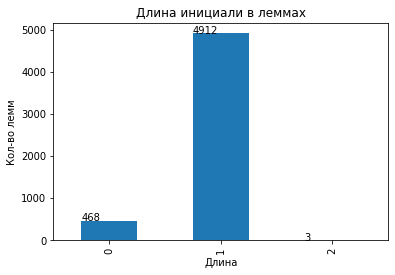

In [33]:
ax = df3['initial len'].value_counts(sort=False).plot.bar()
plt.title('Длина инициали в леммах')
plt.ylabel('Кол-во лемм')
plt.xlabel('Длина')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

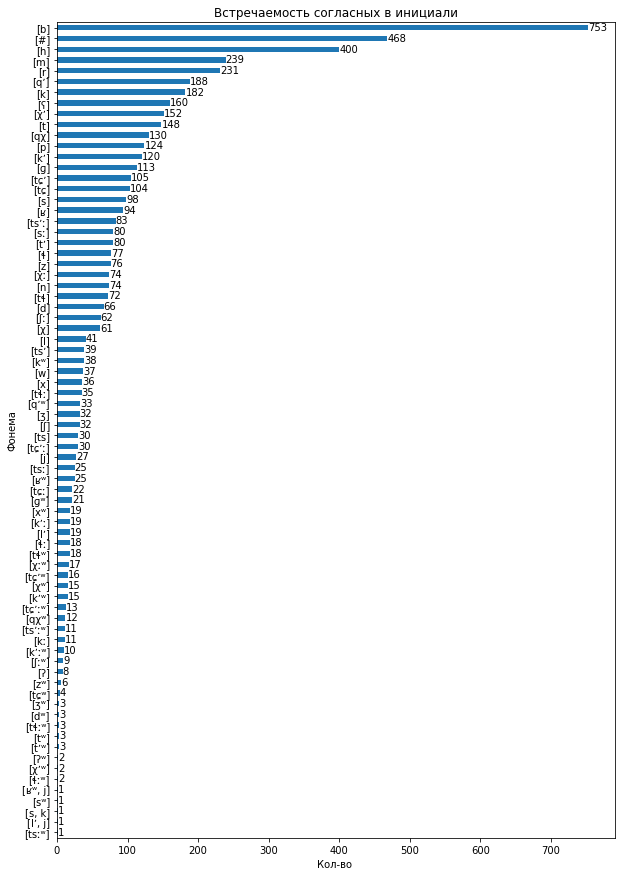

In [34]:
plt.figure(figsize=(10, 15))
ax = df3['initial'].value_counts().sort_values().plot.barh()
plt.title('Встречаемость согласных в инициали')
plt.xlabel('Кол-во ')
plt.ylabel('Фонема')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y()))

### Слова с инициалью в 2 согласных

In [35]:
df3[df3['initial len'] == 2][['lemma','ipa', 'translation']]

,lemma,ipa,translation
1191,ГЪВЙЕ'Р,ʁʷ-j-'e-r,"iii (-ол|, -ди) разговор; хьогьоб гъвйер обсто..."
3029,Л|ЙА'ᴴХ|А,lʼ-j-'ã-χʼ-a,"iii (-л|, -ди) ленивец, ленивица; л|йаᴴх|а зеб..."
3800,СКИДКА',s-k-i-d-k-'a,"iii (-л|, -ди) стойка навытяжку {положение аль..."


# Финаль

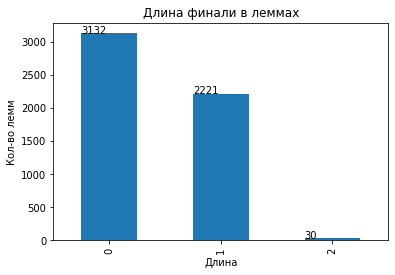

In [36]:
ax = df3['final len'].value_counts(sort=False).plot.bar()
plt.title('Длина финали в леммах')
plt.ylabel('Кол-во лемм')
plt.xlabel('Длина')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

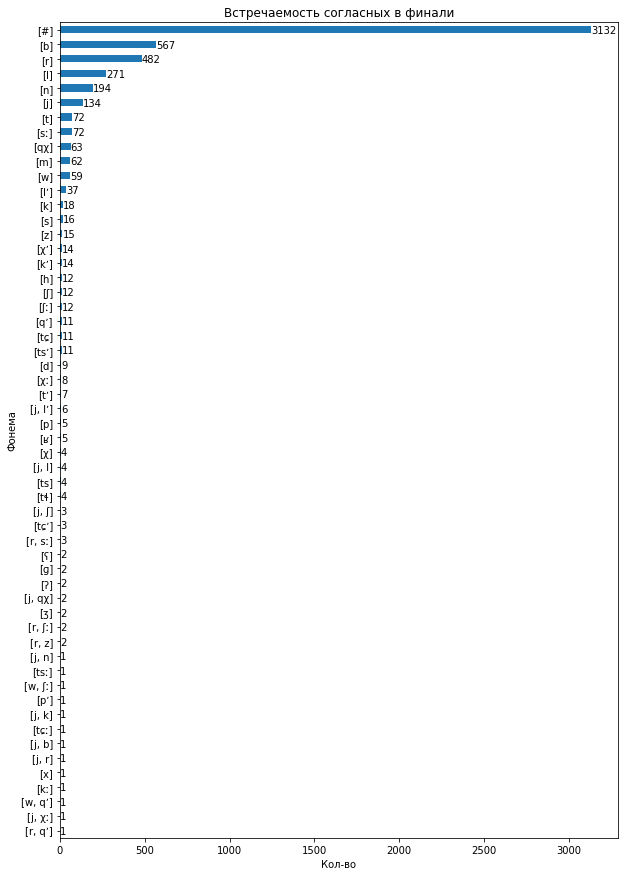

In [37]:
plt.figure(figsize=(10, 15))
ax = df3['final'].value_counts().sort_values().plot.barh()
plt.title('Встречаемость согласных в финали')
plt.xlabel('Кол-во')
plt.ylabel('Фонема')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y()))

# Интервокальные кластеры

In [38]:
INTER = {}
INTER['cluster'] = intervoc_a_norm
INTER['cluster len'] = intervoc_len
df_intervoc = pd.DataFrame(INTER)

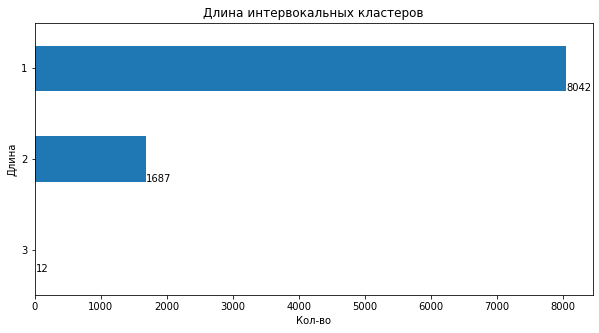

In [39]:
plt.figure(figsize=(10, 5))
ax = df_intervoc[df_intervoc[
    'cluster len'] != 0][
    'cluster len'].value_counts().sort_values().plot.barh()
plt.title('Длина интервокальных кластеров')
plt.xlabel('Кол-во')
plt.ylabel('Длина')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y()))

In [40]:
df_intervoc[df_intervoc['cluster len'] == 3]['cluster'].value_counts()

[j, l, j]     3
[ʃ, d, j]     2
[r, qʼ, p]    2
[l, m, w]     1
[k, s, j]     1
[j, b, ʁʷ]    1
[j, m, j]     1
[r, χ, b]     1
Name: cluster, dtype: int64

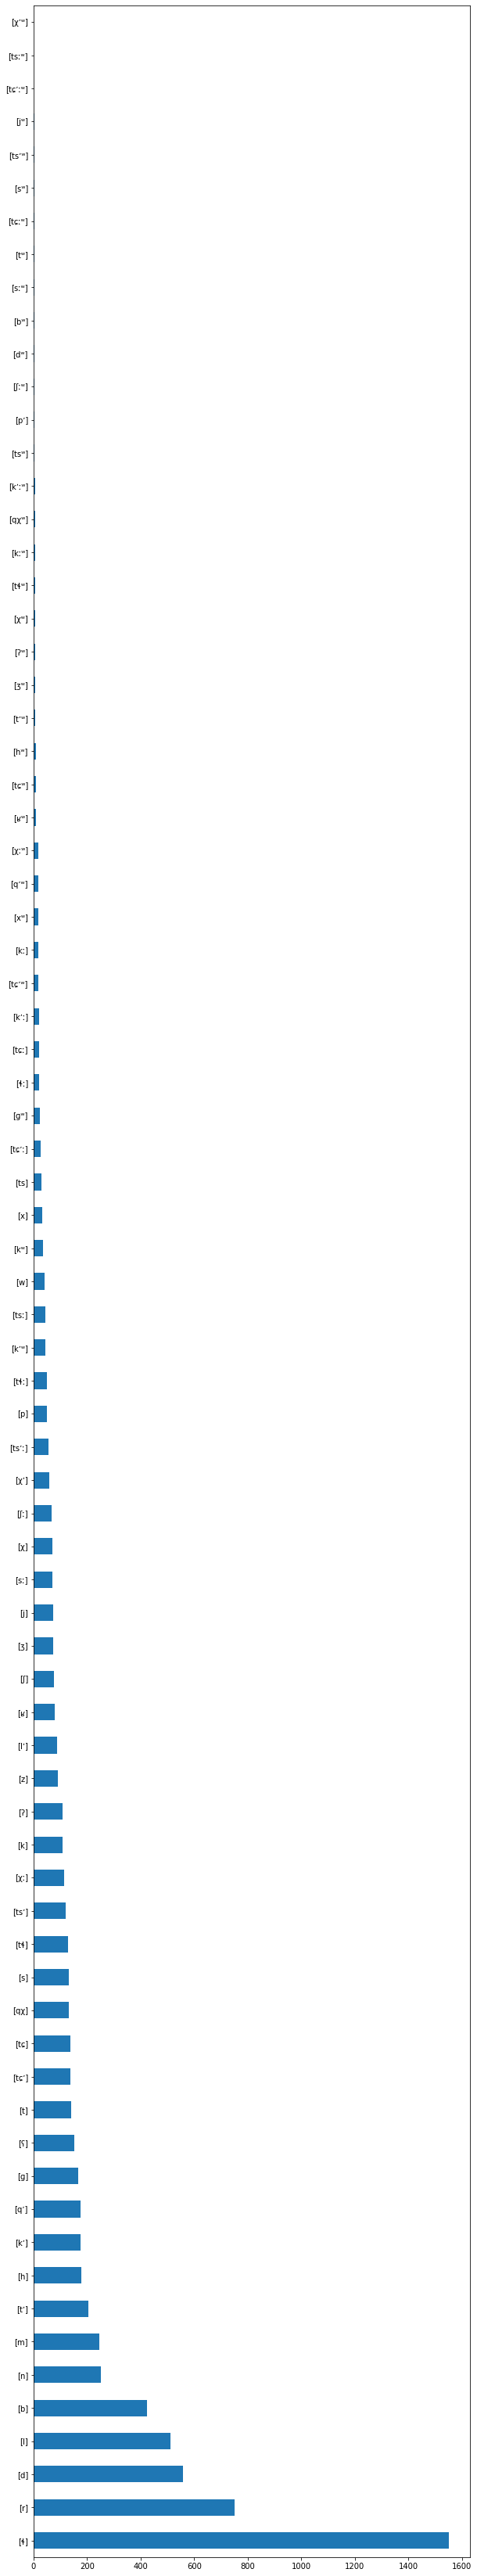

In [41]:
plt.figure(figsize=(10, 60))
df_intervoc[df_intervoc['cluster len'] == 1]['cluster'].value_counts().plot.barh()

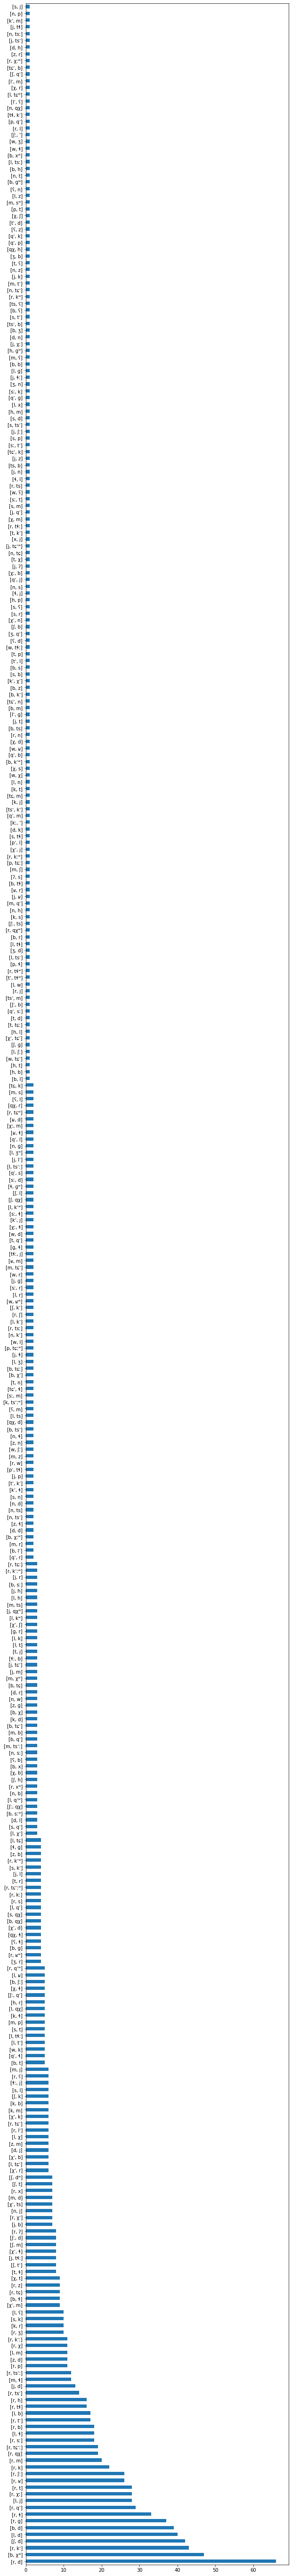

In [42]:
plt.figure(figsize=(10, 100))
df_intervoc[df_intervoc['cluster len'] == 2]['cluster'].value_counts().plot.barh()

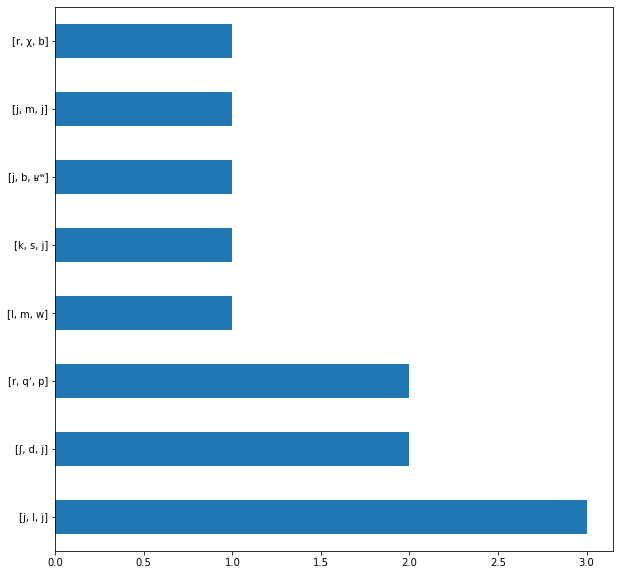

In [43]:
plt.figure(figsize=(10, 10))
df_intervoc[df_intervoc['cluster len'] == 3]['cluster'].value_counts().plot.barh()

# Ударение

In [44]:
stressed_syllable = []
num_of_syllables = []
stressed_phonems = []
for ipa in df3['ipa'].to_list():
    vowels_a = []
    for i in ipa.split('-'):
        if i in vowels+vowels_stressed:
            vowels_a.append(i)
    num_of_syllables.append(len(vowels_a))
    c = 0
    for i in vowels_a:
        if i in vowels_stressed:
            stressed_syllable.append(c+1)
            stressed_phonems.append(i)
            break
        c+=1
    if c == len(vowels_a):
        stressed_syllable.append('no info')
        stressed_phonems.append('no info')
    

In [45]:
df3['number of syllables'] = num_of_syllables
df3['stressed syllable'] = stressed_syllable
df3['stressed phonem'] = stressed_phonems

Text(0, 0.5, 'Кол-во слогов')

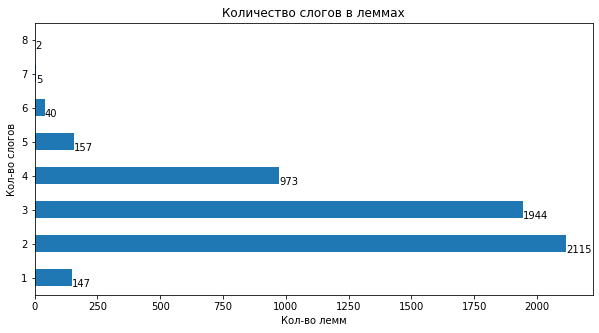

In [46]:
plt.figure(figsize=(10, 5))
ax = df3['number of syllables'].value_counts().sort_index().plot.barh()
plt.title('Количество слогов в леммах')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y()))
plt.xlabel('Кол-во лемм')
plt.ylabel('Кол-во слогов')

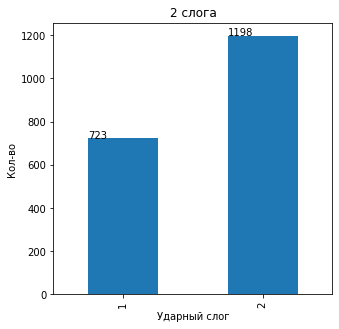

In [47]:
plt.figure(figsize=(5, 5))
ax = df3[(df3['number of syllables'] == 2) 
    & (df3['stressed syllable'] != 'no info')
   ]['stressed syllable'].value_counts(sort=False).plot.bar()
plt.title('2 слога')
plt.xlabel('Ударный слог')
plt.ylabel('Кол-во')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

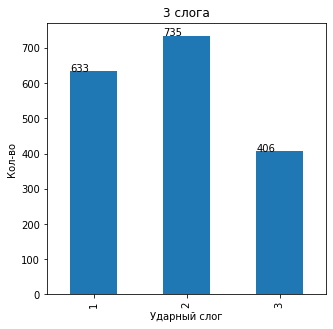

In [48]:
plt.figure(figsize=(5, 5))
ax = df3[(df3['number of syllables'] == 3) 
    & (df3['stressed syllable'] != 'no info')
   ]['stressed syllable'].value_counts(sort=False).plot.bar()
plt.title('3 слога')
plt.xlabel('Ударный слог')
plt.ylabel('Кол-во')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

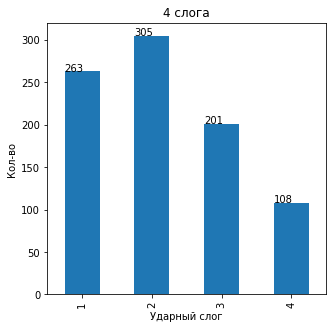

In [49]:
plt.figure(figsize=(5, 5))
ax = df3[(df3['number of syllables'] == 4) 
    & (df3['stressed syllable'] != 'no info')
   ]['stressed syllable'].value_counts(sort=False).plot.bar()
plt.title('4 слога')
plt.xlabel('Ударный слог')
plt.ylabel('Кол-во')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

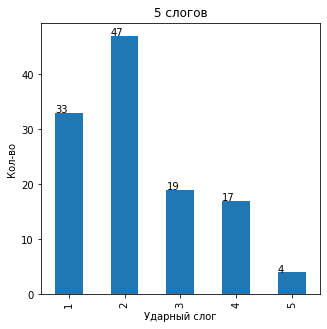

In [50]:
plt.figure(figsize=(5, 5))
ax = df3[(df3['number of syllables'] == 5) 
    & (df3['stressed syllable'] != 'no info')
   ]['stressed syllable'].value_counts(sort=False).plot.bar()
plt.title('5 слогов')
plt.xlabel('Ударный слог')
plt.ylabel('Кол-во')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

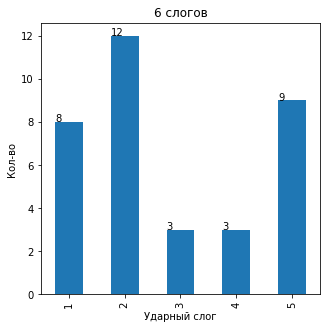

In [51]:
plt.figure(figsize=(5, 5))
ax = df3[(df3['number of syllables'] == 6) 
    & (df3['stressed syllable'] != 'no info')
   ]['stressed syllable'].value_counts(sort=False).plot.bar()
plt.title('6 слогов')
plt.xlabel('Ударный слог')
plt.ylabel('Кол-во')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

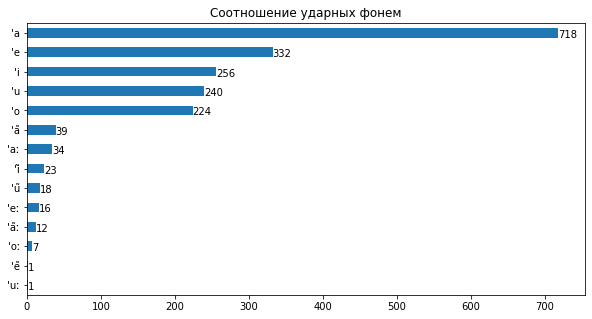

In [52]:
plt.figure(figsize=(10, 5))
ax = df3[(df3['number of syllables'] == 2) 
    & (df3['stressed syllable'] != 'no info')
   ]['stressed phonem'].value_counts().sort_values().plot.barh()
plt.title('Соотношение ударных фонем')
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width(), p.get_y()))